# Analyze

In [126]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

import common_functions as cf

import importlib

importlib.reload(cf)

# Parameters
SENSOR_LAG = 25 # ms
ARRAY_W = 2
ARRAY_H = 2
ARRAY_SIZE = ARRAY_W * ARRAY_H
NAME_PREFIX = "H1_5_s"
# NAMES = [f"H1_5_s{i}" for i in range(ARRAY_SIZE)]


In [127]:
NAMES = [f"{NAME_PREFIX}{i}" for i in range(ARRAY_SIZE)]
data_columns = [f'X{i}' for i in range(ARRAY_SIZE)] + [f'Y{i}' for i in range(ARRAY_SIZE)] + [f'Z{i}' for i in range(ARRAY_SIZE)]

all_data = []

# Loading data (but not in 1 pd.DataFrame)
for name in NAMES:
    TFdata = cf.read_csv_file(f"../scripts/FT300-S_force_torque/data/{name}.csv") 
    sensordata = cf.read_csv_file(f'../scripts/2x2_sensor/data/{name}.csv')
    
    # Time sync
    data = cf.time_sync_data(sensordata, TFdata, SENSOR_LAG / 1000)

    # Remove mean of first 100 samples
    data = cf.offset_data(data, data_columns, 100)

    all_data.append(data)

print("Data loaded. Taxel 0 sensor test")
all_data[0].info()

Data loaded. Taxel 0 sensor test
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9039 entries, 0 to 9038
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    9039 non-null   int64  
 1   t_wall   9039 non-null   float64
 2   X0       9038 non-null   float64
 3   Y0       9038 non-null   float64
 4   Z0       9038 non-null   float64
 5   X1       9038 non-null   float64
 6   Y1       9038 non-null   float64
 7   Z1       9038 non-null   float64
 8   X2       9038 non-null   float64
 9   Y2       9038 non-null   float64
 10  Z2       9038 non-null   float64
 11  X3       9038 non-null   float64
 12  Y3       9038 non-null   float64
 13  Z3       9038 non-null   float64
 14  t_robot  9039 non-null   float64
 15  F_x      9039 non-null   float64
 16  F_y      9039 non-null   float64
 17  F_z      9039 non-null   float64
 18  T_x      9039 non-null   float64
 19  T_y      9039 non-null   float64
 20  T_z      9039 non-n

# Add features

In [128]:
for j in range(ARRAY_SIZE):
    data = all_data[j]
    
    data['F_xy'] = np.sqrt(data['F_x']**2 + data['F_y']**2)
    data['F_m'] = np.sqrt(data['F_x']**2 + data['F_y']**2 + data['F_z']**2)
    
    for i in range(ARRAY_SIZE):
        data[f'XY{i}'] = np.sqrt(data[f'X{i}']**2 + data[f'Y{i}']**2)
        data[f'M{i}'] = np.sqrt(data[f'X{i}']**2 + data[f'Y{i}']**2 + data[f'Z{i}']**2)

# Scatterplots

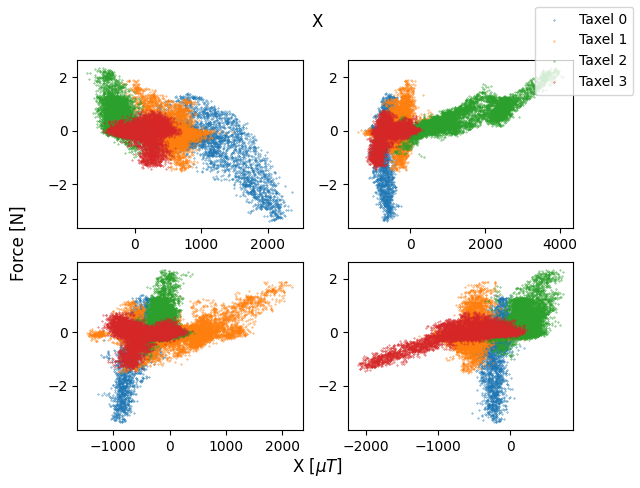

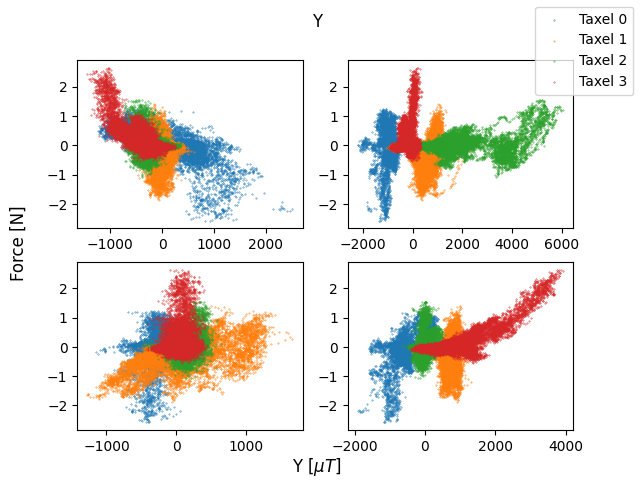

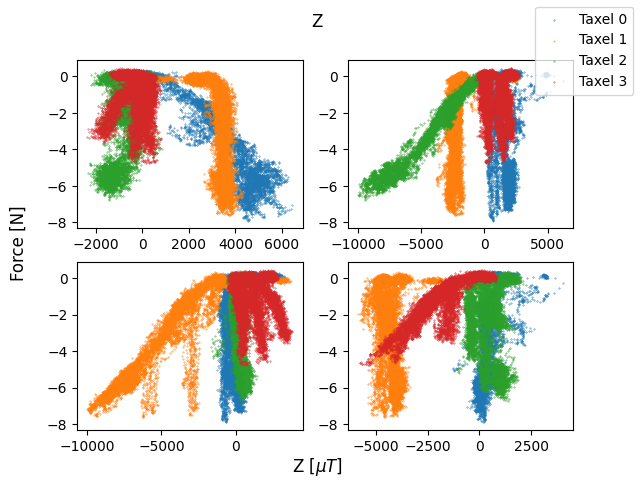

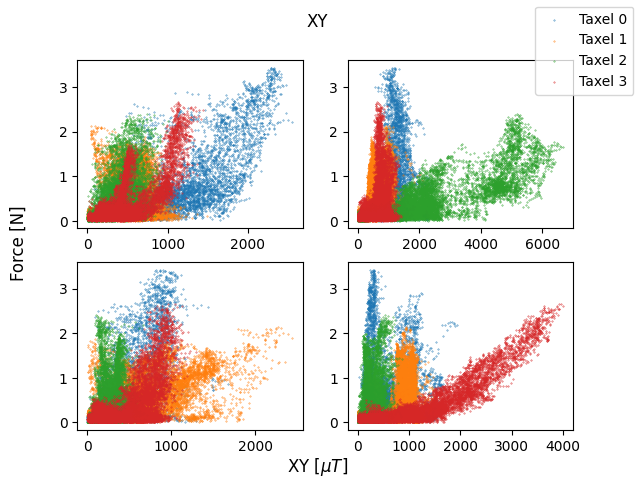

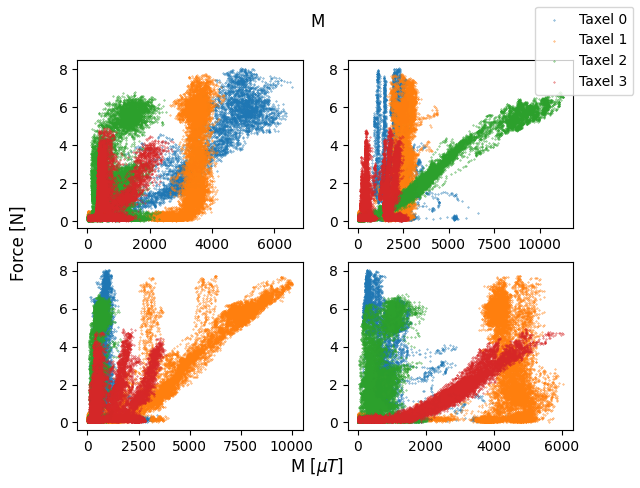

In [129]:
for letter in ['X', 'Y', 'Z', 'XY', 'M']:

  fig = plt.figure()
  gs = fig.add_gridspec(ARRAY_H, ARRAY_W)
  axs = gs.subplots()
  
  for i in range(ARRAY_SIZE):
    for w in range(ARRAY_W):
      for h in range(ARRAY_H):

        if ARRAY_SIZE == 1:
          ax = axs
        else:    
          ax = axs[h, w]
          
          data = all_data[i]
          ax.scatter(data[f'{letter}{w*ARRAY_W+h}'], data[f'F_{letter.lower()}'], s=0.1, label=f'Taxel {i}')
      
  fig.supylabel('Force [N]')
  fig.supxlabel(fr'{letter} [$\mu T$]')
  
  lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes[:1]]
  lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
  fig.legend(lines, labels)
  
  plt.suptitle(f'{letter}')
  plt.show()